# Identifying Surfer's Experience Group Based on Performed Manoeuvres 

Guilherme Branco Loureiro		-		Florianópolis - SC - Brazil		-		September 29th, 2019

### Udacity's Capstone Project - Machine Learning Engineer Nanodegree
***

# 1. Definition

## 1.1 Project Overview
Research about surfboard is scarce.
A query for 'Surfboard' in [Scopus](https://www.scopus.com/results/results.uri?numberOfFields=0&src=s&clickedLink=&edit=&editSaveSearch=&origin=searchbasic&authorTab=&affiliationTab=&advancedTab=&scint=1&menu=search&tablin=&searchterm1=surfboard&field1=TITLE_ABS_KEY&dateType=Publication_Date_Type&yearFrom=Before+1960&yearTo=Present&loadDate=7&documenttype=All&accessTypes=All&resetFormLink=&st1=surfboard&st2=&sot=b&sdt=b&sl=24&s=TITLE-ABS-KEY%28surfboard%29&sid=836201fdfd01a316e29aaf87c508a17e&searchId=836201fdfd01a316e29aaf87c508a17e&txGid=e849352791f4cd3a5c7fa87e60011e9d&sort=plf-f&originationType=b&rr=) results only 235 documents (by September 2019). 
Surfing is a sport in which a surfer performs manouevres over the surface of a wave, with a surfboard.
The more experienced the surfer, the more complex manoeuvres he's able to perform.
The right surfboard specification implies in acknowledging theses features and translating them into surfboard specs.
Therefore, strong correlation between the surfer's **experience level** and the range of **manoeuvres** is expected. 
The objective of this work is to propose a **supervised** approach to predict the surfers experience level given a set of manoeuvres.

There are no publications about this correlation (experience X manoeuvres), nor a, experience prediction application based on surfing's performed manoeuvres. 

This problem is relevant because it could contribute to the surfboard specification process, making recommendation more assertive.

The problem's understanding is aided by the **Feature Similarity Analysis (Dimensionality Reduction)** provided by the Principal Component Analysis (PCA), which allows ten dimensions to be seen as only two in a byplot graph. Reducing its complexity and improving it's didactics.

The **supervised** problem is solved with a decision tree.


## 1.2 Problem Statement
The problem to be solved is the lack of methods to determine what is the experience level of a surfer given a set of manoeuvres he's able to perform.


## 1.3 Metrics
**Accuracy** is the metric chosen to measure the performance of the Decision Tree Prediction Model. Accuracy describes how good a model is, in terms of how many cases were correctly classified. In this project Accuracy describes how many times the surfer's experience level was correctly classified, relatively to the total number of cases. 

***
# 2. Analysis
## 2.1 Data Exploration (before preprocessing)

### Modules Importation

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

### Exploring dataset content

In [2]:
df = pd.read_csv("df_manoeuvres_experience.csv")
df = df.drop(df.columns[0], axis=1)
df.head()

,manoeuvres_01_paddling,manoeuvres_02_drop,manoeuvres_03_straight_ahead,manoeuvres_04_wall_riding,manoeuvres_05_floater,manoeuvres_06_cut_back,manoeuvres_07_carve,manoeuvres_08_off_the_lip,manoeuvres_09_tube,manoeuvres_10_air,surfer_experience
0,Sempre consigo,Sempre consigo,Sempre consigo,Sempre consigo,Sempre consigo,Consigo normalmente,Consigo normalmente,Consigo normalmente,Consigo normalmente,As vezes eu consigo,Avançado
1,Consigo normalmente,As vezes eu consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Ainda não consigo,Aprendiz
2,Sempre consigo,Consigo normalmente,Sempre consigo,Consigo normalmente,As vezes eu consigo,Consigo normalmente,Consigo normalmente,Consigo normalmente,As vezes eu consigo,Ainda não consigo,Avançado
3,Sempre consigo,Consigo normalmente,Não sei,Consigo normalmente,As vezes eu consigo,As vezes eu consigo,Consigo normalmente,Consigo normalmente,As vezes eu consigo,Ainda não consigo,Avançado
4,Sempre consigo,Consigo normalmente,Consigo normalmente,Sempre consigo,Consigo normalmente,Consigo normalmente,Sempre consigo,Sempre consigo,As vezes eu consigo,Ainda não consigo,Avançado


### Checking dataset size

In [3]:
df.shape[0]
print(f'The dataframe has {df.shape[0]} samples and {df.shape[1]} features')

The dataframe has 165 samples and 11 features


### Exploring features

In [4]:
df.columns.tolist()

['manoeuvres_01_paddling',
 'manoeuvres_02_drop',
 'manoeuvres_03_straight_ahead',
 'manoeuvres_04_wall_riding',
 'manoeuvres_05_floater',
 'manoeuvres_06_cut_back',
 'manoeuvres_07_carve',
 'manoeuvres_08_off_the_lip',
 'manoeuvres_09_tube',
 'manoeuvres_10_air',
 'surfer_experience']

The first 10 features are **inputs**, and the last one (`surfer_experience`) is an **output** to be further used as target.

### Data description

In [5]:
df.describe()

,manoeuvres_01_paddling,manoeuvres_02_drop,manoeuvres_03_straight_ahead,manoeuvres_04_wall_riding,manoeuvres_05_floater,manoeuvres_06_cut_back,manoeuvres_07_carve,manoeuvres_08_off_the_lip,manoeuvres_09_tube,manoeuvres_10_air,surfer_experience
count,162,162,145,161,162,161,162,163,162,155,164
unique,3,4,5,5,5,5,5,5,5,5,5
top,Sempre consigo,Sempre consigo,Sempre consigo,Sempre consigo,Sempre consigo,Consigo normalmente,Sempre consigo,As vezes eu consigo,Ainda não consigo,Ainda não consigo,Avançado
freq,119,84,97,99,47,43,53,49,56,100,81


### Check unique answers

In [6]:
df.iloc[:, 5].unique().tolist()

['Consigo normalmente',
 'Ainda não consigo',
 'As vezes eu consigo',
 'Sempre consigo',
 nan,
 'Não sei']

In [7]:
df.iloc[:, 10].unique().tolist()

['Avançado', 'Aprendiz', 'Intermediário', 'Iniciante', 'Profissional', nan]

### Getting a sample

In [8]:
df.iloc[0, :]

manoeuvres_01_paddling               Sempre consigo
manoeuvres_02_drop                   Sempre consigo
manoeuvres_03_straight_ahead         Sempre consigo
manoeuvres_04_wall_riding            Sempre consigo
manoeuvres_05_floater                Sempre consigo
manoeuvres_06_cut_back          Consigo normalmente
manoeuvres_07_carve             Consigo normalmente
manoeuvres_08_off_the_lip       Consigo normalmente
manoeuvres_09_tube              Consigo normalmente
manoeuvres_10_air               As vezes eu consigo
surfer_experience                          Avançado
Name: 0, dtype: object

***
*Run Data preprocessing [3.1] before running the cells of the following section!*
Otherwise data will appear in Portuguese.
***
## 2.2 Exploratory Visualization (after preprocessing)

### Exploring data distribution
There are only a few Beginners in our dataset, as seen bellow.

Advanced        84
Intermediate    66
Beginner        14
Name: surfer_experience, dtype: int64

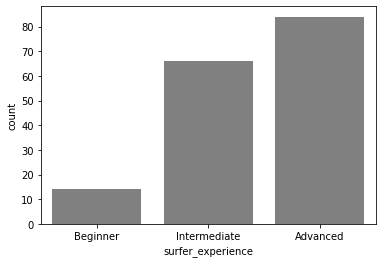

In [11]:
df['surfer_experience']
order = ['Beginner', 'Intermediate', 'Advanced']
import seaborn as sns
sns.countplot(data = df, x='surfer_experience', order=order, color = 'gray');
df['surfer_experience'].value_counts()

### Prepare Manoeuvres frequency of execution

In [12]:
df_counts = pd.DataFrame()

for col in df:
    df_counts[col] = df[col].value_counts()
   

df_counts.drop(columns='surfer_experience', inplace=True)
df_counts

,01_paddling,02_drop,03_straight_ahead,04_wall_riding,05_floater,06_cut_back,07_carve,08_off_the_lip,09_tube,10_air
Always,119,84,97,99,47,43,53,48,27,3
Usually,38,62,32,38,28,43,38,45,14,9
Sometimes,5,15,8,15,42,38,38,49,55,20


In [13]:
df_counts = df_counts.transpose()
df_counts = df_counts.reset_index()
df_counts.columns = ['Manoeuvres', 'Always', 'Usually', 'Sometimes']
df_counts

,Manoeuvres,Always,Usually,Sometimes
0,01_paddling,119,38,5
1,02_drop,84,62,15
2,03_straight_ahead,97,32,8
3,04_wall_riding,99,38,15
4,05_floater,47,28,42
5,06_cut_back,43,43,38
6,07_carve,53,38,38
7,08_off_the_lip,48,45,49
8,09_tube,27,14,55
9,10_air,3,9,20


### Explore Manoeuvres frequency of execution

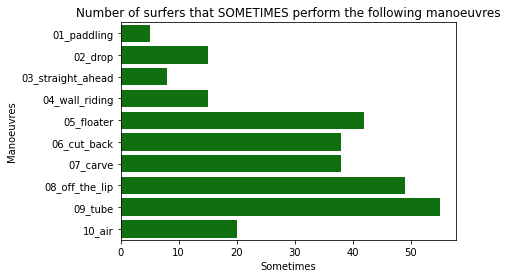

In [14]:
sns.barplot(x="Sometimes", y="Manoeuvres", data=df_counts, label="Total", color="green");
plt.title('Number of surfers that SOMETIMES perform the following manoeuvres');

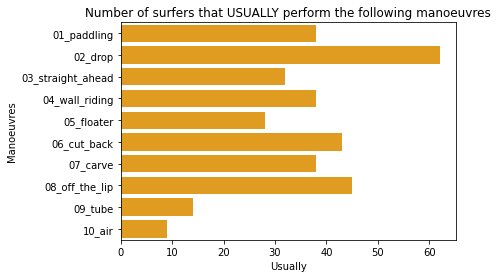

In [15]:
sns.barplot(x="Usually", y="Manoeuvres", data=df_counts, label="Total", color="orange");
plt.title('Number of surfers that USUALLY perform the following manoeuvres');

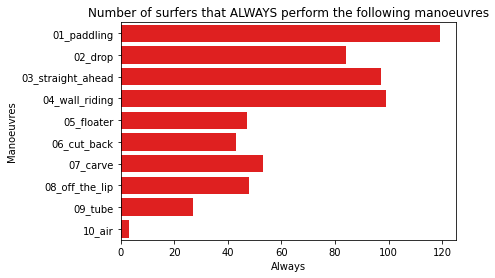

In [16]:
sns.set_color_codes("pastel")
sns.barplot(x="Always", y="Manoeuvres", data=df_counts, label="Total", color="red");
plt.title('Number of surfers that ALWAYS perform the following manoeuvres');

## 2.3 Algorithms and Techniques
- PCA for Feature Similarity Analysis
- Naive Bayes classifier for multinomial models
- Decision Tree for predicting the surfer's experience level

## 2.4 Benchmark
- **Naive model** -  representing a Shaper (surfboard designer) that has no idea of the surfer's experience level and randomly estimates the experience of each surfer. Implemented further in this notebook.

***

# 3. Methodology
## 3.1 Data Preprocessing

### Renaming features
The names of the features are to long for quick coding, so we'll shorten them by removing the 'manoeuvres_' prefix.

In [17]:
new_columns = []
for col in df.columns:
    if 'manoeuvre' in col:
        new_columns.append(col[11:])
    else:
        new_columns.append(col)

df.columns = new_columns
print('The new feature names are:')
[print(col) for col in df.columns];

The new feature names are:
01_paddling
02_drop
03_straight_ahead
04_wall_riding
05_floater
06_cut_back
07_carve
08_off_the_lip
09_tube
10_air
surfer_experience


### Translating to English
As noticed, the answers are in Portuguese, so we have to translate to English.

For the sake of simplification, we'll reduce the five levels to three.

In [18]:
# Manoeuvres execution frequency
translation_frequency = {
    'Ainda não consigo': 'Not yet',
    'As vezes eu consigo': 'Sometimes',
    'Consigo normalmente': 'Usually',
    'Sempre consigo': 'Always',
    'Não sei': "I don't know",
}

# Five expected levels of experience
translation_level = {
    'Aprendiz': 'Beginner',
    'Iniciante': 'Beginner',
    'Intermediário': 'Intermediate',
    'Avançado': 'Advanced',
    'Profissional': "Advanced",
}

df.replace(inplace=True, to_replace=translation_frequency)
df.replace(inplace=True, to_replace=translation_level)
df.head()

,01_paddling,02_drop,03_straight_ahead,04_wall_riding,05_floater,06_cut_back,07_carve,08_off_the_lip,09_tube,10_air,surfer_experience
0,Always,Always,Always,Always,Always,Usually,Usually,Usually,Usually,Sometimes,Advanced
1,Usually,Sometimes,Not yet,Not yet,Not yet,Not yet,Not yet,Not yet,Not yet,Not yet,Beginner
2,Always,Usually,Always,Usually,Sometimes,Usually,Usually,Usually,Sometimes,Not yet,Advanced
3,Always,Usually,I don't know,Usually,Sometimes,Sometimes,Usually,Usually,Sometimes,Not yet,Advanced
4,Always,Usually,Usually,Always,Usually,Usually,Always,Always,Sometimes,Not yet,Advanced


### Scaling frequency adverbs - 0 to 1

As seen in `df_x`, the answers express the frequency of execution of each manoeuvre.
Hence, we need to scale them from `0` to `1`, so they can be quantifiable.
For so, we'll use a replacement dictionary, as follows.

In [19]:
replacement_dict = {
    'Not yet': 0,
    'Sometimes': 0.33,
    'Usually': 0.66,
    'Always': 1,
    "I don't know": np.nan,
}
df.replace(inplace=True, to_replace=replacement_dict)

# Filling NaN with mean value
# df_x.fillna(df_x.mean(), inplace=True)
# df_x

### Managing NaN - Dropping rows with NaN in any column

In [20]:
# Check stats about NaN rows
df_nan = pd.concat([df, df.dropna(how='any')]).drop_duplicates(keep=False)

In [21]:
# Dropping NaN in the 'surfer_experience' column
print(df.shape)
# df.dropna(how='any', subset=['surfer_experience'], inplace=True)
print(df.shape)
df.dropna(how='any', inplace=True)
print(df.shape)

(165, 11)
(165, 11)
(110, 11)


## 3.2 Implementation

### 3.2.1 Splitting features: input and output

In [22]:
# Prepare input features
df_x = df.drop(['surfer_experience'], axis=1)

# Filling NaN with mean value
# df_x.fillna(df_x.mean(), inplace=True)
df_x.head()

,01_paddling,02_drop,03_straight_ahead,04_wall_riding,05_floater,06_cut_back,07_carve,08_off_the_lip,09_tube,10_air
0,1.00,1.00,1.00,1.00,1.00,0.66,0.66,0.66,0.66,0.33
1,0.66,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,0.66,1.00,0.66,0.33,0.66,0.66,0.66,0.33,0.00
4,1.00,0.66,0.66,1.00,0.66,0.66,1.00,1.00,0.33,0.00
5,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.33


In [23]:
# Prepare output feature
s_y = df['surfer_experience']
s_y.head()

0    Advanced
1    Beginner
2    Advanced
4    Advanced
5    Advanced
Name: surfer_experience, dtype: object

### 3.2.2 Correlation Analysis

#### Getting correlation among features

In [24]:
# Correlation among features
df_corr = df_x.corr().round(2)
df_corr

,01_paddling,02_drop,03_straight_ahead,04_wall_riding,05_floater,06_cut_back,07_carve,08_off_the_lip,09_tube,10_air
01_paddling,1.00,0.63,0.51,0.54,0.32,0.39,0.42,0.37,0.30,0.12
02_drop,0.63,1.00,0.65,0.75,0.58,0.58,0.66,0.61,0.45,0.29
03_straight_ahead,0.51,0.65,1.00,0.62,0.38,0.43,0.42,0.40,0.27,0.13
04_wall_riding,0.54,0.75,0.62,1.00,0.63,0.63,0.70,0.69,0.49,0.27
05_floater,0.32,0.58,0.38,0.63,1.00,0.80,0.82,0.84,0.81,0.58
06_cut_back,0.39,0.58,0.43,0.63,0.80,1.00,0.86,0.77,0.73,0.52
07_carve,0.42,0.66,0.42,0.70,0.82,0.86,1.00,0.85,0.72,0.48
08_off_the_lip,0.37,0.61,0.40,0.69,0.84,0.77,0.85,1.00,0.74,0.51
09_tube,0.30,0.45,0.27,0.49,0.81,0.73,0.72,0.74,1.00,0.64
10_air,0.12,0.29,0.13,0.27,0.58,0.52,0.48,0.51,0.64,1.00


#### Plot correlation heatmap
Numbers are good, but colors are better!

> "The stronger the red, the stronger the correlation"

It can be noticed some correlation among the 05_floater and the 06 to 09 manoeuvres, which indicates that a surfer that is able to perform a floater, is also able to perform a cut_back, carve, off_the_lip and catch a tube.

On the other hand, a surfer that surfs straight_ahead is not likely to perform the manoeuvres mentioned before.

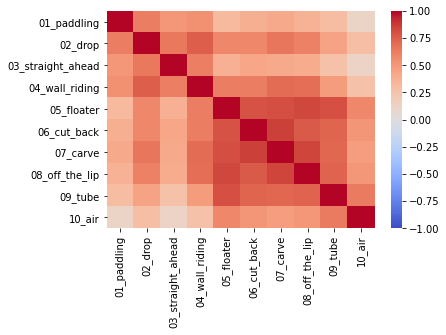

In [25]:
ax = sns.heatmap(df_corr, cmap='coolwarm', vmin=-1, vmax=1)

### 3.2.3 Feature Similarity Analysis (Dimensionality Reduction)
Since we have 10 manoeuvres, we would need a graph with 10 dimensions in order to visualize how the experience levels are distributed.
Hence, we apply the PCA technique.

#### Implementing PCA and visualizing dimensions plot

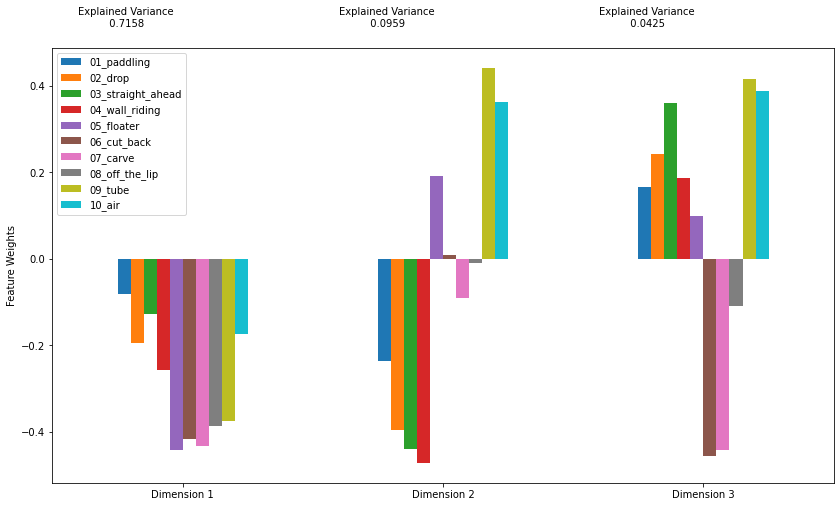

In [26]:
# TODO Implement PCA
from sklearn.decomposition import PCA
import visuals as vs


# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=3)
pca.fit(df_x);

pca_results = vs.pca_results(df_x, pca)

The insights we get from the 3 PCA dimensions are:
- Dimension 1 indicates all manoeuvres influence the experience level;
- Dimension 2 indicates that manoeuvres 'floater', 'tube' and 'air' are some how closely oriented. As opposed to manoeuvres 1, 2, 3, 4 and 7;
- Dimension 3 indicates that manoeuvres 'cut_back', 'carve' and 'off_the_lip'are some how closely oriented.

These are only assumptions that must be verified later.

In [27]:
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(df_x)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])

In [28]:
## Functions preparation from Udacity's resources

import matplotlib.pyplot as plt
def biplot(good_data, reduced_data, pca, colors=None):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14, 8))

    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors=colors,
        edgecolors='b',
        s=70,
#         alpha=0.5
        )
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 1.1, 1.2,


    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.05, head_length=0.05, linewidth=1, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=10)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16)

    return ax

#### Assigning colors to labels

In [29]:
colors_dict = {
    'Beginner': 'red',
    'Intermediate': 'yellow',
    'Advanced': 'green',
}
# print(list(s_y))
s_y.fillna('error_gui', inplace=True)
# print(colors_dict[s_y[0]])
s_colors = s_y.apply(lambda x: colors_dict.get(x, 'white'))
s_colors.head()  # series of colors representing each label

0    green
1      red
2    green
4    green
5    green
Name: surfer_experience, dtype: object

#### Visualizing PCA Biplot

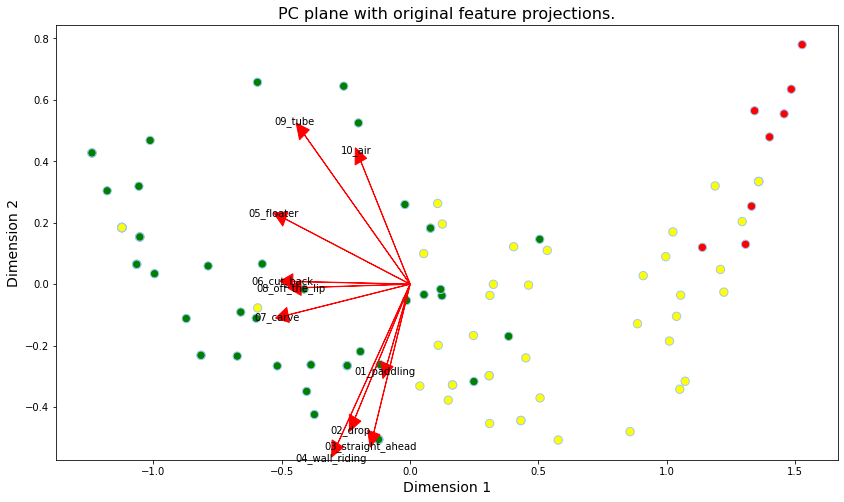

In [30]:
# Create a biplot
biplot(df_x, reduced_data, pca, s_colors);

In [31]:
print('BIPLOT LEGEND')
for k, v in colors_dict.items():
    k = k.ljust(14)
    print(f'\tLevel: {k}color: {v}')

BIPLOT LEGEND
	Level: Beginner      color: red
	Level: Intermediate  color: yellow
	Level: Advanced      color: green


#### Interpreting PCA Biplot

In the biplot visualization the direction of the vectors indicate how aligned they are with each other.
The first four manoeuvres (Paddling, Drop, Straight ahead and Wall riding) are close on the bottom of the figure.
Cut_back, carve and off_the_lip are also close to each other, on the left of the figure parallel to the horizontal axis.
The last three (floater, tube and air) are a bit far from each other.
The interesting thing about these vectors is the significance of their angles.
The easiest manoeuvre to perform is paddling, whilst the hardest is air.
Therefore, the difficulty of each manoeuvre is expressed clock-wise.
Hours in a clock are equivalent to the experience required.
If we had to to segment the surfer's experience in 10 cluster, we'd succeed by following the manoeuvres clock-wise.
This represents a verification concept.

We could imagine a 5 cluster division:
1. Paddling, Drop, Straight ahead and Wall riding
2. Cut_back, Carve and off_the_lip
3. Floater
4. Tube
5. Air

Or even, a simpler, 3 cluster division:
1. Paddling, Drop, Straight ahead and Wall riding
2. Cut_back, Carve and Off_the_lip
3. Floater, Tube and Air

### 3.2.4 Benchmark model

In [56]:
# Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(df_x, s_y)

acc_nb = clf.score(df_x, s_y)
print(f'Mean accuracy of the Multinomial Naive Bayes model: {int(acc_nb*100)}%')
print()
print(f'Probability for the BEGINNER class: {(clf.predict_proba(df_x)[:, 1].mean() * 100).round(1)}%')
print(f'Probability for the INTERMEDIATE class: {(clf.predict_proba(df_x)[:, 2].mean() * 100).round(1)}%')
print(f'Probability for the ADVANCED class: {(clf.predict_proba(df_x)[:, 0].mean() * 100).round(1)}%')

Mean accuracy of the Multinomial Naive Bayes model: 73%

Probability for the BEGINNER class: 5.8%
Probability for the INTERMEDIATE class: 35.1%
Probability for the ADVANCED class: 59.1%


### 3.2.5 Prediction model 
#### Decision Tree (Full)

In [60]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = df_x
y = s_y

random_states = [10, 20, 30, 40, 42]
accs = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=random_state)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_full = accuracy_score(y_test, y_pred)
    accs.append(acc_full)
    print(f'\tRandom state:{random_state}\t\tAccuracy: {int(acc_full*100)}%')
print(f'Mean accuracy: {int(np.mean(accs)*100)}%')
print(f'Standard deviation of Accuracy: {np.std(accs).round(3)}')

	Random state:10		Accuracy: 79%
	Random state:20		Accuracy: 77%
	Random state:30		Accuracy: 81%
	Random state:40		Accuracy: 70%
	Random state:42		Accuracy: 79%
Mean accuracy: 77%
Standard deviation of Accuracy: 0.039


In [59]:
print(f"X.shape: {X.shape}")
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y.shape: {y.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X.shape: (110, 10)
X_train.shape: (66, 10)
X_test.shape: (44, 10)
y.shape: (110,)
y_train.shape: (66,)
y_test.shape: (44,)


#### Interpreting the model
- The 110 rows of data was randomly split using a 0.40 factor: 40% (44) became the testing set and 60% (66) became the training set;
- Accuracy was verified for different random_states. Its mean value is 77%;

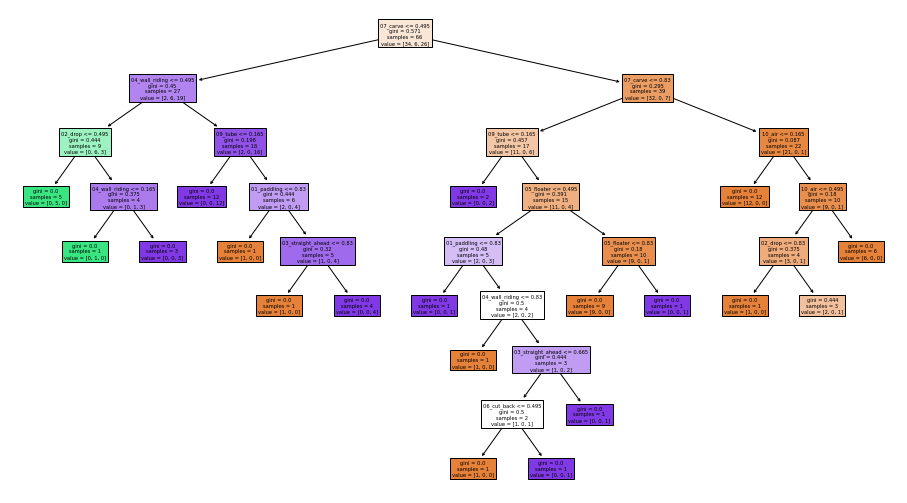

In [61]:
# Plot full decision tree

fig = plt.gcf()
fig.set_size_inches(16, 9)
plot_tree(model, filled=True, feature_names=X.columns);
fig.savefig('tree_full_00.svg')

#### Checking feature importance

In [62]:
feat_imp = model.feature_importances_
s_feat_imp = pd.Series(feat_imp*100, index=X.columns)
s_feat_imp.sort_values(ascending=False).round(1)

07_carve             43.7
04_wall_riding       18.6
05_floater            9.5
09_tube               7.7
02_drop               7.3
03_straight_ahead     5.3
01_paddling           4.0
06_cut_back           2.8
10_air                1.1
08_off_the_lip        0.0
dtype: float64

## 3.3 Refinement
#### Decision Tree (Reduced)
Simplifying model by reducing the dataset to the two most important features: 07_carve(46%) and 04_wall_riding(16%)

In [63]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = df_x
y = s_y

X_reduced = X.loc[:, ['04_wall_riding', '07_carve']]

accs = []
random_states = [10, 20, 30, 40, 42]
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.40, random_state=random_state)
    model_reduced = DecisionTreeClassifier()
    model_reduced.fit(X_train, y_train)
    y_pred = model_reduced.predict(X_test)
    acc_reduced = accuracy_score(y_test, y_pred)
    accs.append(acc_reduced)
    print(f'Random state:{random_state}\t\tAccuracy: {int(acc_reduced*100)}%')
print(f'Mean accuracy: {int(np.mean(accs)*100)}%')
print(f'Standard deviation of Accuracy: {np.std(accs).round(3)}')

Random state:10		Accuracy: 75%
Random state:20		Accuracy: 72%
Random state:30		Accuracy: 88%
Random state:40		Accuracy: 79%
Random state:42		Accuracy: 81%
Mean accuracy: 79%
Standard deviation of Accuracy: 0.056


#### Interpretating the reduced model
- The mean accuracy with the reduced model is 79%;
- As observed in the previous cell, its reasonable to say the reduced model is prone to get 4 right predictions out of 5.

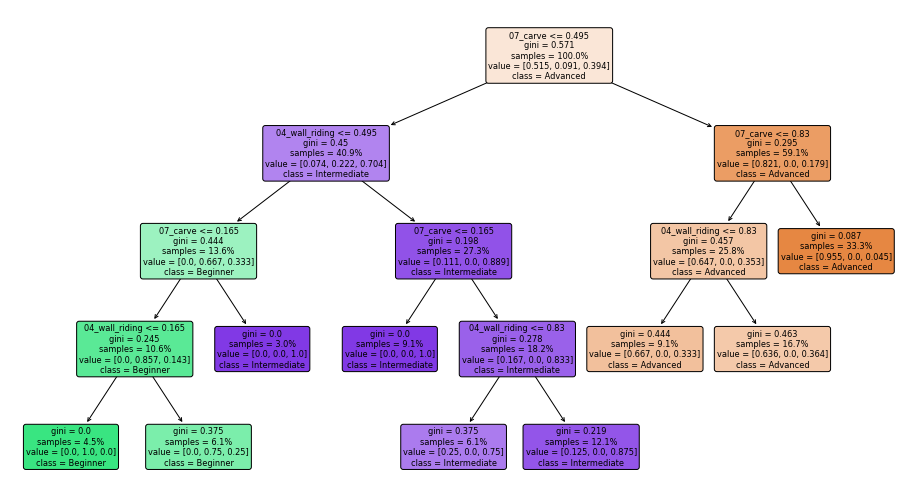

In [67]:
# Plot full decision tree
fig = plt.gcf()
fig.set_size_inches(16, 9)
plot_tree(model_reduced, rounded=True, filled=True, proportion=True, feature_names=X_reduced.columns, class_names=y.unique());
fig.savefig('tree_reduced_01.svg')

In [66]:
# get params details
print(f'Depth: {model_reduced.get_depth()}')
print(f'Number of leaves: {model_reduced.get_n_leaves()}')

Depth: 4
Number of leaves: 9


***
# 4. Results
## 4.1 Model Evaluation and Validation

The final model was chosen based on its supposed use: during surfboard recommendation among a surfer and a shaper.

It's assumed that surfers may find tedious to answer 10 questions for the recommendation process. Hence a reduced model is more likely to succed.

Two features account for around 60% of the total importance of the model (`07_carve: 44%` and `04_wall_riding: 19%`). Only theses two features compose the reduced and final model.

The final model has 4 levels of depth and 9 leaves (as seen in the Figure aboce), which leads to an accuracy of 79%.


**The final model is reasonable and aligns with the expected solution:** The reduced model is chosen as the final model because it offers a reasonable accuracy (80%) whilst using only 20% of the inputs of the full model dataset.
In practice, this means only two questions (instead of ten) are needed in order to predict the surfers experience level.


**The final model was tested with various input sets:** varied due to the verified random_states.

**The final model is robust:** Different random states yield small accuracy standard deviation (0.056).

## 4.2 Justification

### Benchmark comparison

In [68]:
print(f'The FULL decision tree accuracy is {(acc_full / acc_nb - 1).round(3) * 100}% above reference')
print(f'The REDUCED decision tree accuracy is {(acc_reduced / acc_nb - 1).round(3) * 100}% above reference')

The FULL decision tree accuracy is 8.0% above reference
The REDUCED decision tree accuracy is 11.1% above reference


These results and solution  are significant because they overcome the naive model (unexperienced shaper) by 11%.

The reduced decision tree could be printed and used manually (without any computer). The full tree is too complex for that purpose;

***
# 5. Conclusion

## 5.1 Free-Form Visualization

The decision process provided by the tree represented in its Figure starts with the evaluation of surfers capacity to perform the carve manoeuvre. If he usually (0.66) or always (1.00) execute it, he's considered an advanced surfer, as all the following leaves of the right branch are orange, which outputs the `class: Advanced` as seen in the orange boxes.

On the other hand if a surfer is unable to perform a carve or wallriding manoeuvre, then he's classified as a beginner, and he'll cruise the most left branch of the tree, following the green leaves were `class: Beginner`.

A third surfer, intermediate would fall in the purple leaves, around the middle of the tree.

## 5.2 Reflection

The following sections describe the work process of this project.

**Data was explored:**

- the content of the first rows were observed,
- the size of the dataset was calculated (165 rows and 11 columns),
- the name of each column was explored,
- the unique values of the features were identified,
- data was statistically described,
- the dataset is unbalanced. It has to few Beginner observations (14), compared to Intermediate (66) and Advanced (84).

**Data was visually explored:**
Data was visually explored evidencing the left-skewed distribution of experience among the respondent surfers. The frequency of execution of each manoeuvre was calculated and ploted accordingly to the level of experience.

**Data was preprocessed:**

- Features were renamed, 
- Data was translated to English and scaled with respect to the intensity of frequency adverbs,
- 45 Rows with any NaN (not a number) were discarted,
- Data was split into two: input (X) and output (y);

**Algorithms and models were implemented:**

- Data correlation was analyzed. It was found that floater is a manoeuvre highly correlated to others.
- Feature similarity was analyzed. Within a PCA analysis, the vectors which represent each feature were compared, in terms of direction and intensity. The cut-back and off-the-lip manoeuvres are pretty similar.
- A Naive Bayes classifier for multinomial model was set as benchmark, which sets the accuracy reference at 73%.
- A decision tree with the full dataset was implemented yielding an accuracy of 77%.
- Two features are the most important: 07_carve (44% of importance) and 04_wall_riding (19%). The feature importance provided the insight to simplify the model by reducing its number of input features.
- A reduced decision tree with only 2 out of 10 input features was implemented, resulting in a lighter model with higher accuracy (79%). This represents the refined and chosen model.
- The model can be simplified to only two of the ten features, whilst imporving accuracy (win-win decision). In practice, this means the shaper only needs to ask two instead of ten questions to the surfer to predict his experience level.
- Figures were generated to help the understanding of the decision process of each tree. The reduced model is more intuitive, as expected.
- Some experience levels declared by the surfers may be wrong, as the same manoeuvres inputs may yield different experience labels. This is probably due to the subjectivity inherent in the statement of one's own experience.

**Interesting aspect**

The most interesting aspect of this project is that one single feature `07_carve` accounts for 44% of the models importance. This fact really surprised me. I didn't expect such a high number.

**Difficult aspect**

The most difficult aspect was the uncertainty about how to manage the NaN values. I'm not 100% comfortable about simply dropping any row that has a NaN in it.

## 5.3 Improvement
- The most promising aspect to improve the model is two fold:
    - Fine tune the decision tree with respect to `max_depth`, `min_samples_split` and `min_samples_leaf`;
    - Vary the number of features of the reduced models, start by analysing with only one feature `07_carve` feature. Then, explore with three features, and so on.
- Explore different alternatives about managing NaN, which requires further research;
- Interpretate the decision tree (graphically generated) with expert shapers, in order to tune it;
- It's highly encourage the exploration and comparison of other supervised algorithms.